<a href="https://colab.research.google.com/github/Elwing-Chou/ml0804/blob/master/%E4%BA%BA%E8%87%89%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install face_recognition

結衣長這樣: [-0.04895474  0.09968525  0.03298839 -0.08207116 -0.14540555  0.05939646
 -0.09492336 -0.07435843  0.14043663 -0.14739342  0.20634086 -0.07939011
 -0.26035938  0.00433009 -0.06953894  0.20029208 -0.17209572 -0.1611104
  0.00512666  0.06093763  0.092314    0.10178247 -0.04988471  0.02034085
 -0.13647661 -0.33048135 -0.11771646 -0.02487956 -0.0737486  -0.0769213
 -0.0365603   0.06265247 -0.14612037  0.04194324  0.08830965  0.12930022
 -0.01090565 -0.09508227  0.09320484  0.01554034 -0.3058807   0.04281523
  0.10781858  0.24393341  0.18546778  0.00756028 -0.05167533 -0.15322009
  0.10694038 -0.15903367  0.04726423  0.16826126  0.08280957  0.09337662
  0.01579029 -0.14668913  0.01656873  0.16464017 -0.1016451  -0.02068388
  0.07701804 -0.06265602  0.07561867 -0.09418746  0.17832813  0.03525798
 -0.11125398 -0.23695812  0.13572271 -0.15388    -0.12040108  0.0932026
 -0.21636249 -0.23390704 -0.26926827  0.03389246  0.27983955  0.15407485
 -0.17420615  0.06408532  0.06480606  0.0276776

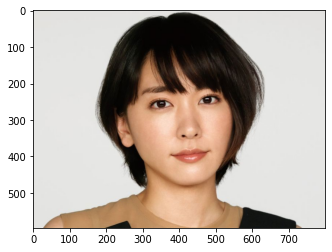

In [17]:
import matplotlib.pyplot as plt
import face_recognition
img = face_recognition.load_image_file("新垣結衣.jpg")
en = face_recognition.face_encodings(img)[0]
print("結衣長這樣:", en)
plt.imshow(img)

In [18]:
import glob

sub = ["jfif", "jpg", "png", "jpeg"]
fn_list = []
for s in sub:
    fn_list = fn_list + glob.glob("*.{}".format(s))
encodings, names = [], []
for fn in fn_list:
    img = face_recognition.load_image_file(fn)
    en = face_recognition.face_encodings(img)[0]
    encodings.append(en)
    n = fn.split(".")[0]
    names.append(n)
print(names)
print(encodings)

['新垣結衣', '費玉清', '韓國瑜', '蔡英文', '陳時中']
[array([-0.04895474,  0.09968525,  0.03298839, -0.08207116, -0.14540555,
        0.05939646, -0.09492336, -0.07435843,  0.14043663, -0.14739342,
        0.20634086, -0.07939011, -0.26035938,  0.00433009, -0.06953894,
        0.20029208, -0.17209572, -0.1611104 ,  0.00512666,  0.06093763,
        0.092314  ,  0.10178247, -0.04988471,  0.02034085, -0.13647661,
       -0.33048135, -0.11771646, -0.02487956, -0.0737486 , -0.0769213 ,
       -0.0365603 ,  0.06265247, -0.14612037,  0.04194324,  0.08830965,
        0.12930022, -0.01090565, -0.09508227,  0.09320484,  0.01554034,
       -0.3058807 ,  0.04281523,  0.10781858,  0.24393341,  0.18546778,
        0.00756028, -0.05167533, -0.15322009,  0.10694038, -0.15903367,
        0.04726423,  0.16826126,  0.08280957,  0.09337662,  0.01579029,
       -0.14668913,  0.01656873,  0.16464017, -0.1016451 , -0.02068388,
        0.07701804, -0.06265602,  0.07561867, -0.09418746,  0.17832813,
        0.03525798, -0.111

網址:https://image6.thenewslens.com/2018/3/dtumwslpix6vmt7449r8titbpwgyuv.jpg?auto=compress&fit=crop&h=648&q=85&updated_at=2018-03-21-19-39-56&w=1080


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 新垣結衣 的距離是: 0.7722322155122953
跟 費玉清 的距離是: 0.7401790147437979
跟 韓國瑜 的距離是: 0.7841056350560462
跟 蔡英文 的距離是: 0.7646782765992497
跟 陳時中 的距離是: 0.732470684079216
這個最像: 陳時中


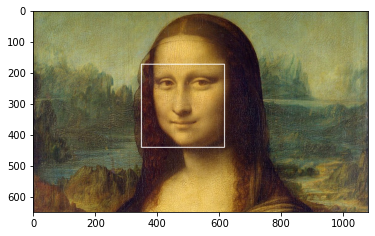

In [23]:
import requests
import cv2
url = input("網址:")
response = requests.get(url, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)
ens = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)
for (top, right, bottom, left), en in zip(locs, ens):
    # 圖片, 左上, 右下, 框顏色(BGR), 框粗細
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 2)
    distances = face_recognition.face_distance(en, encodings)
    for d, n in zip(distances, names):
        print("跟", n, "的距離是:", d)
    # argmin/argmax: 找出最大/最小值的索引
    mind = names[distances.argmin()]
    print("這個最像:", mind)
plt.imshow(img)